## augmented_data_v2

In [1]:
import zipfile
!rm -r ./augmented_data
!rm ./augm_data_v2.zip
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1x8LBri6mji7OEfylBtsapZxHixS-Dv_J' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1x8LBri6mji7OEfylBtsapZxHixS-Dv_J" -O augm_data_v2.zip && rm -rf /tmp/cookies.txt

with zipfile.ZipFile('./augm_data_v2.zip', 'r') as zip_ref:
        print('The extraction of the images can take some time...')
        zip_ref.extractall('./')
        print('Extraction done')

rm: cannot remove './augmented_data': No such file or directory
rm: cannot remove './augm_data_v2.zip': No such file or directory
--2019-12-13 12:16:17--  https://docs.google.com/uc?export=download&confirm=k_RI&id=1x8LBri6mji7OEfylBtsapZxHixS-Dv_J
Resolving docs.google.com (docs.google.com)... 74.125.195.102, 74.125.195.100, 74.125.195.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-08-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p4ru4geglbf0lt1848gnmff90cjduqvs/1576238400000/17506844314399870089/*/1x8LBri6mji7OEfylBtsapZxHixS-Dv_J?e=download [following]
--2019-12-13 12:16:17--  https://doc-08-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/p4ru4geglbf0lt1848gnmff90cjduqvs/1576238400000/17506844314399870089/*/1x8LBri6mji7OEfylBtsapZxHixS-Dv_J?e=download
Resolving doc-08-24-docs.googleusercontent.com (

## augmented_data_v3 
- with half-half train-validation
- si_augmented train and cut_half validation for healthy and irregular

In [60]:
import zipfile
!rm -r ./augmented_data
!rm ./augm_data_v3.zip
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1wzceLpAZW_5Lw5KW3W3HKgAPPvz1cuSG' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1wzceLpAZW_5Lw5KW3W3HKgAPPvz1cuSG" -O augm_data_v3.zip && rm -rf /tmp/cookies.txt

with zipfile.ZipFile('./augm_data_v3.zip', 'r') as zip_ref:
        print('The extraction of the images can take some time...')
        zip_ref.extractall('./')
        print('Extraction done')

--2019-12-09 14:30:26--  https://docs.google.com/uc?export=download&confirm=c9jE&id=1wzceLpAZW_5Lw5KW3W3HKgAPPvz1cuSG
Resolving docs.google.com (docs.google.com)... 74.125.20.139, 74.125.20.102, 74.125.20.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.20.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bb58h82obu8d4eelsl6civemqm5qflhi/1575900000000/17506844314399870089/*/1wzceLpAZW_5Lw5KW3W3HKgAPPvz1cuSG?e=download [following]
--2019-12-09 14:30:26--  https://doc-14-24-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/bb58h82obu8d4eelsl6civemqm5qflhi/1575900000000/17506844314399870089/*/1wzceLpAZW_5Lw5KW3W3HKgAPPvz1cuSG?e=download
Resolving doc-14-24-docs.googleusercontent.com (doc-14-24-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-14-24-docs.googleusercontent.com (do

# SWISH

In [8]:
from keras.backend import sigmoid

def swish(x, beta = 1):
    return (x * sigmoid(beta * x))

from keras.utils.generic_utils import get_custom_objects
from keras.layers import Activation

swish = Activation(swish)
swish.__name__ = 'swish'

get_custom_objects().update({'swish': swish})

# RUN FROM HERE

In [7]:
SEED = 777

train_path = './augmented_data/train/'
val_path = './augmented_data/validation/'

epochs = 30
#with 3 was it the best
batch_size = 3
image_size = (280, 280)
image_shape = (*image_size, 3) # add RGB channel

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 278, 278, 128)     3584      
_________________________________________________________________
activation_10 (Activation)   (None, 278, 278, 128)     0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 92, 92, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 90, 90, 128)       147584    
_________________________________________________________________
activation_11 (Activation)   (None, 90, 90, 128)       0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 45, 45, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 43, 43, 64)       

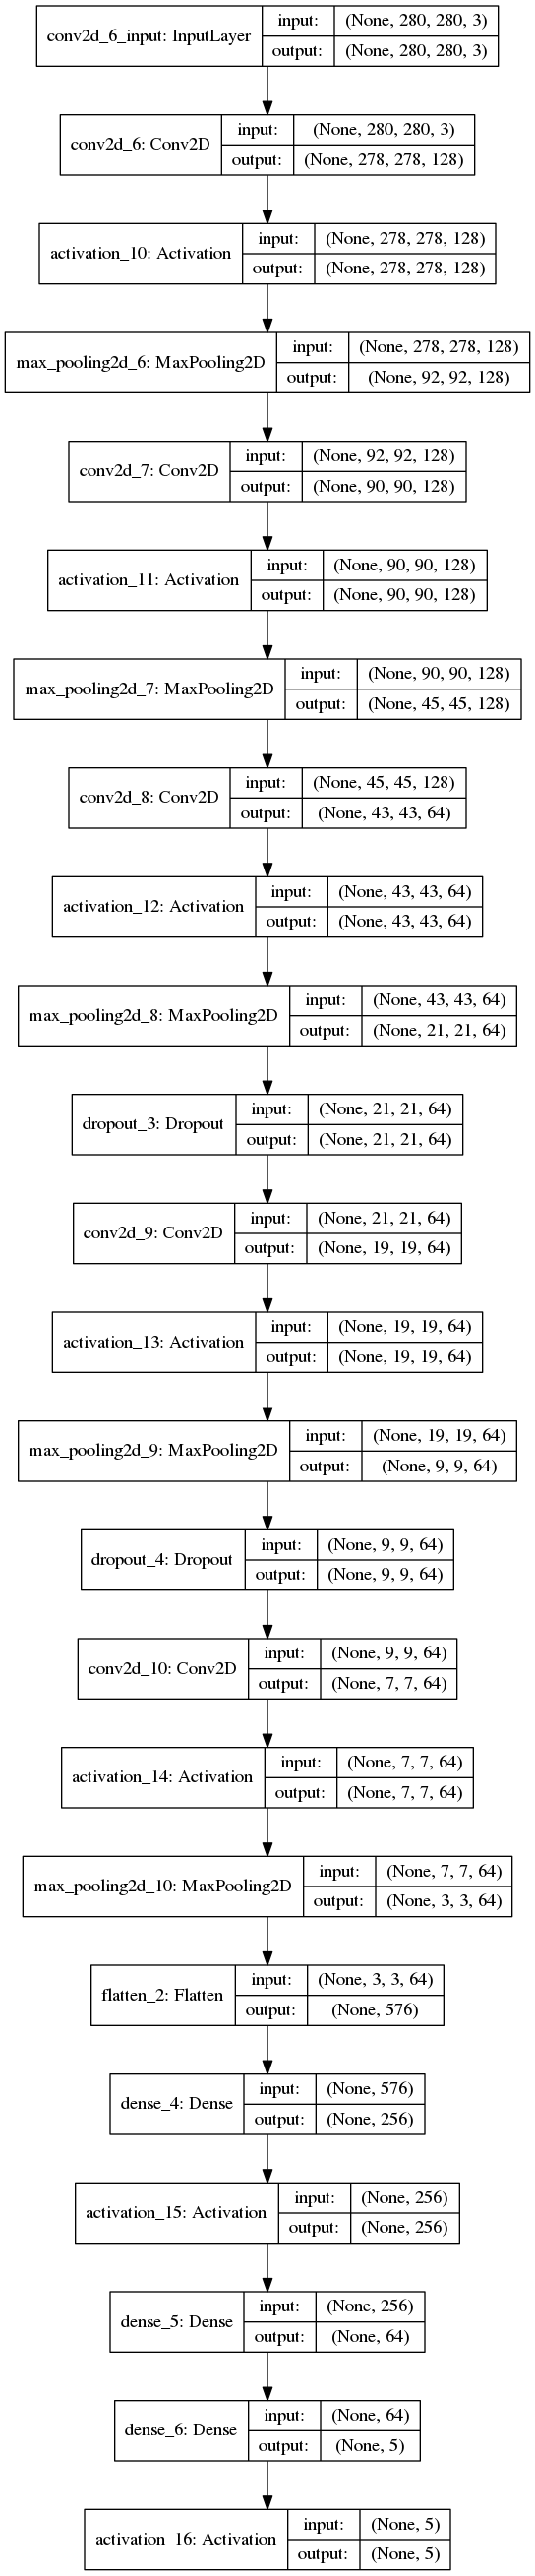

In [9]:
import tensorflow as tf
import numpy as np
from keras import optimizers
from keras.utils import plot_model

tf.random.set_seed(SEED)
np.random.seed(SEED)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(128, (3, 3), input_shape=image_shape))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(3, 3)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(256))
model.add(Activation('swish'))
model.add(Dense(64, activation='swish'))
model.add(Dense(5))
model.add(Activation('softmax'))
# COMPILE
own_rms_prop = optimizers.RMSprop(learning_rate=0.00001, rho=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=own_rms_prop,
              metrics=['accuracy'])
model.summary()
plot_model(model, to_file='own_dcnn.png', show_shapes=True, show_layer_names=True)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        val_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

num_of_train_samples = len(train_generator)*batch_size
num_of_val_samples = len(validation_generator)*batch_size

Found 14675 images belonging to 5 classes.
Found 2695 images belonging to 5 classes.


In [11]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint 

MODEL_NAME = 'augmented_test3.h5'
history = None

if not os.path.exists(MODEL_NAME):
    # es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=100)
    mc = ModelCheckpoint(MODEL_NAME, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

    history = model.fit_generator(
            train_generator,
            steps_per_epoch=num_of_train_samples // batch_size,
            epochs=epochs,
            validation_data=validation_generator,
            validation_steps=num_of_val_samples // batch_size,
            callbacks=[mc])
            #callbacks=[es, mc])
else:
    print('Change model name because calling this will delete the existing "{}" file'.format(MODEL_NAME))

Epoch 1/30
4892/4892 [==============================] - 97s 20ms/step - loss: 1.5457 - accuracy: 0.2707 - val_loss: 1.1620 - val_accuracy: 0.4686

Epoch 00001: val_loss improved from inf to 1.16199, saving model to augmented_test3.h5
Epoch 2/30
4892/4892 [==============================] - 96s 20ms/step - loss: 1.3778 - accuracy: 0.4243 - val_loss: 1.1178 - val_accuracy: 0.3904

Epoch 00002: val_loss improved from 1.16199 to 1.11782, saving model to augmented_test3.h5
Epoch 3/30
4892/4892 [==============================] - 96s 20ms/step - loss: 1.3051 - accuracy: 0.4583 - val_loss: 1.5905 - val_accuracy: 0.3558

Epoch 00003: val_loss did not improve from 1.11782
Epoch 4/30
4892/4892 [==============================] - 96s 20ms/step - loss: 1.2358 - accuracy: 0.4843 - val_loss: 1.2302 - val_accuracy: 0.3035

Epoch 00004: val_loss did not improve from 1.11782
Epoch 5/30
4892/4892 [==============================] - 96s 20ms/step - loss: 1.1967 - accuracy: 0.5026 - val_loss: 0.9105 - val_acc

In [12]:
import matplotlib.pyplot as plt

def plot_losses(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper left')
    plt.show()
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train accuracy', 'Validation accuracy'], loc='lower right')
    plt.show()

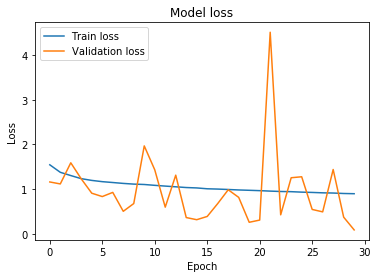

In [13]:
plot_losses(history)

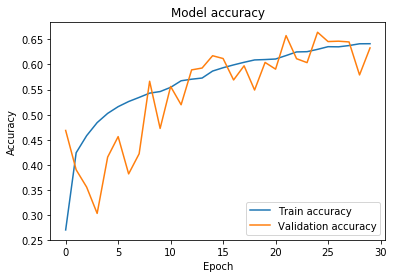

In [14]:
plot_acc(history)